This Notebook computes and displays various processing algorithms on an image captured with a webcam.
Processing is done mainly using OpenCV.
The processing includes:
0. Capturing photo with webcam
1. Decomposing to R,G,B values
2. Converting to grayscale
3. Face and eye detection
4. Blurring
5. Sharpening
6. Denoising
7. Edge detection
8. Calculating the histogram

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [4]:
# Camera 0 is the integrated web cam on my netbook
camera_port = 0
 
#Number of frames to throw away while the camera adjusts to light levels
ramp_frames = 30
 
# Now we can initialize the camera capture object with the cv2.VideoCapture class.
# All it needs is the index to a camera port.
camera = cv2.VideoCapture(camera_port)
 
# Captures a single image from the camera and returns it in PIL format
def get_image():
 # read is the easiest way to get a full image out of a VideoCapture object.
 retval, im = camera.read()
 return im
 
# Ramp the camera - these frames will be discarded and are only used to allow v4l2
# to adjust light levels, if necessary
for i in xrange(ramp_frames):
 temp = get_image()
print("Taking image...")
# Take the actual image we want to keep
camera_capture = get_image()
file = "webcam_img.png"
# A nice feature of the imwrite method is that it will automatically choose the
# correct format based on the file extension you provide. Convenient!
cv2.imwrite(file, camera_capture)
 
# You'll want to release the camera, otherwise you won't be able to create a new
# capture object until your script exits
del(camera)

Taking image...


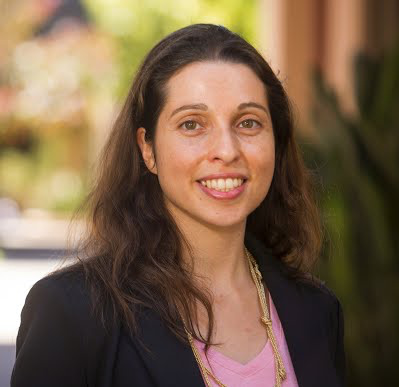

In [5]:
file = "webcam_img.png"
from IPython.display import Image
Image(filename=file) 

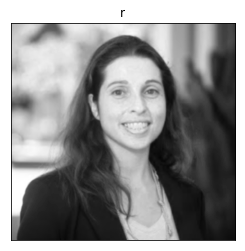

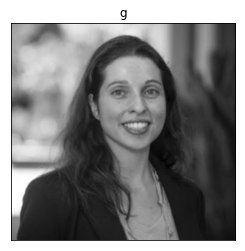

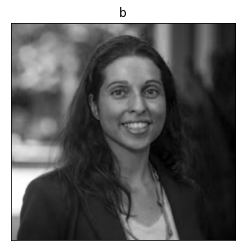

In [6]:
file = "webcam_img.png"
img = cv2.imread(file)
b,g,r = cv2.split(img)

plt.imshow(r, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('r')
plt.show()

plt.imshow(g, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('g')
plt.show()

plt.imshow(b, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('b')
plt.show()

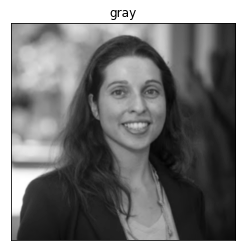

In [7]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
gray = rgb2gray(img)    
plt.imshow(gray, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('gray')
plt.show()

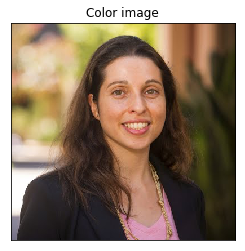

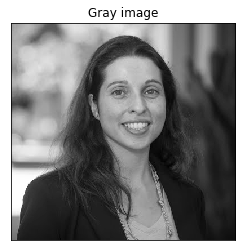

[[142  65 152 152]
 [162 258 112 112]]


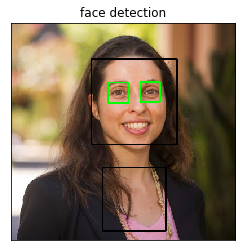

In [8]:
# img = cv2.imread(file)
# img = cv2.imread("C:\Users\orly\Dropbox\Photos\Orly portraite\orly 5-28-14.jpg")
file = "webcam_img.png"
# print file
img = cv2.imread(file,1)
# print img
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('Color image')
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('Gray image')
plt.show()

cascPath = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascPath)
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print faces
cascPath = 'haarcascade_eye.xml'
eye_cascade = cv2.CascadeClassifier(cascPath)
for (x,y,w,h) in faces:
    img2 = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
         img2 = cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('face detection')
plt.show()

In [9]:
print np.shape(img)
cv2.imwrite("webcam_img_face_detection.png", img)

(387, 399, 3)


True

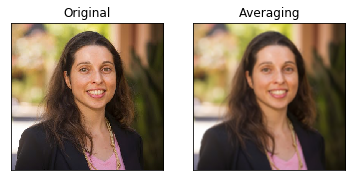

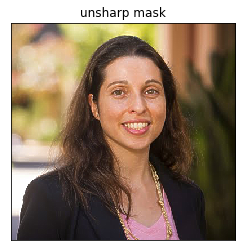

True

In [10]:
file = "webcam_img.png"
img = cv2.imread(file)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
unsharp = cv2.add(cv2.subtract(img,dst),img)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cv2.cvtColor(unsharp, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('unsharp mask')
plt.show()

cv2.imwrite("webcam_img_blurred.png", dst)
cv2.imwrite("webcam_img_unsharp_mask.png", unsharp)

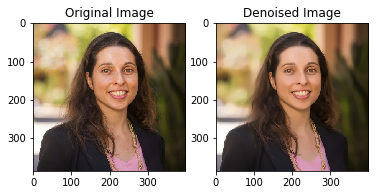

True

In [11]:
file = "webcam_img.png"
img = cv2.imread(file)

dst = cv2.fastNlMeansDenoisingColored(img,None,5,5,7,21)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Denoised Image')
plt.show()
cv2.imwrite("webcam_img_denoised.png", dst)

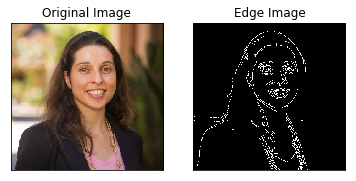

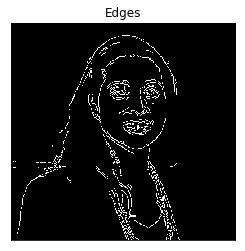

In [12]:
file = "webcam_img.png"
img = cv2.imread(file)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


plt.imshow(edges,cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title('Edges')
plt.show()

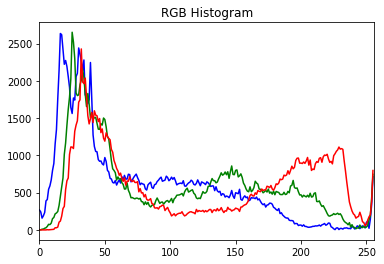

In [13]:
file = "webcam_img.png"
img = cv2.imread(file)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('RGB Histogram')
plt.show()